# Recurrent neural networks

In [1]:
import csv
import itertools
import nltk
import sys

import numpy as np


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [2]:
vocabulary_size = 75

with open("Dane/kod.txt") as f:
    sentences = f.readlines()

In [3]:
sentences = [s for s in sentences if s.strip() != '']

In [4]:
sentences[:10]

['class RNNNumpy:\n',
 '    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):\n',
 '        # Assign instance variables\n',
 '        self.word_dim = word_dim\n',
 '        self.hidden_dim = hidden_dim\n',
 '        self.bptt_truncate = bptt_truncate\n',
 '        # Randomly initialize the network parameters\n',
 '        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))\n',
 '        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))\n',
 '        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))\n']

In [5]:
tokenized_sentences = [list(sent) for sent in sentences]

In [6]:
tokenized_sentences[:3]

[['c',
  'l',
  'a',
  's',
  's',
  ' ',
  'R',
  'N',
  'N',
  'N',
  'u',
  'm',
  'p',
  'y',
  ':',
  '\n'],
 [' ',
  ' ',
  ' ',
  ' ',
  'd',
  'e',
  'f',
  ' ',
  '_',
  '_',
  'i',
  'n',
  'i',
  't',
  '_',
  '_',
  '(',
  's',
  'e',
  'l',
  'f',
  ',',
  ' ',
  'w',
  'o',
  'r',
  'd',
  '_',
  'd',
  'i',
  'm',
  ',',
  ' ',
  'h',
  'i',
  'd',
  'd',
  'e',
  'n',
  '_',
  'd',
  'i',
  'm',
  '=',
  '1',
  '0',
  '0',
  ',',
  ' ',
  'b',
  'p',
  't',
  't',
  '_',
  't',
  'r',
  'u',
  'n',
  'c',
  'a',
  't',
  'e',
  '=',
  '4',
  ')',
  ':',
  '\n'],
 [' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  '#',
  ' ',
  'A',
  's',
  's',
  'i',
  'g',
  'n',
  ' ',
  'i',
  'n',
  's',
  't',
  'a',
  'n',
  'c',
  'e',
  ' ',
  'v',
  'a',
  'r',
  'i',
  'a',
  'b',
  'l',
  'e',
  's',
  '\n']]

In [7]:
vocab = np.unique([item for sublist in tokenized_sentences for item in sublist]) 
index_to_word = [x[0] for x in vocab]

word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
 
print( "Using vocabulary size %d." % len(vocab))

# Create the training data
X_train = np.asarray([[word_to_index[w] for w in sent[:-1]] for sent in tokenized_sentences])
y_train = np.asarray([[word_to_index[w] for w in sent[1:]] for sent in tokenized_sentences])


print( "\nExample sentence: '%s'" % sentences[0])
print( "\nExample sentence after Pre-processing: '%s'" % tokenized_sentences[0])
print( X_train[0])
print( y_train[0])

Using vocabulary size 75.

Example sentence: 'class RNNNumpy:
'

Example sentence after Pre-processing: '['c', 'l', 'a', 's', 's', ' ', 'R', 'N', 'N', 'N', 'u', 'm', 'p', 'y', ':', '\n']'
[50, 59, 48, 66, 66, 1, 37, 34, 34, 34, 68, 60, 63, 72, 19]
[59, 48, 66, 66, 1, 37, 34, 34, 34, 68, 60, 63, 72, 19, 0]


In [10]:
X_train.shape

(157,)

In [8]:
class RNNNumpy:
     
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        # Assign instance variables
        self.word_dim = word_dim
        self.hidden_dim = hidden_dim
        self.bptt_truncate = bptt_truncate
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))



In [9]:
def forward_propagation(self, x):
    # The total number of time steps
    T = len(x)
    # During forward propagation we save all hidden states in s because need them later.
    # We add one additional element for the initial hidden, which we set to 0
    h = np.zeros((T + 1, self.hidden_dim))
    h[-1] = np.zeros(self.hidden_dim)
    # The outputs at each time step. Again, we save them for later.
    o = np.zeros((T, self.word_dim))
    # For each time step...
    for t in np.arange(T):
        # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
         
        x_t =  np.eye(len(vocab))[x[t]] # Kodowanie one-hot. 
                                        # Formalnie rzecz biorac, x_t jest gotowym wektorem wprowadzanym do sieci,
                                        # ale dla wygody tu przetwarzamy indeks na wektor
        
        h[t] = np.tanh(np.dot(self.U, x_t) + np.dot(self.W, h[t-1])) # obliczanie stanu ukrytego
        o[t] = softmax(np.dot(self.V, h[t])) # predykcja dla x_t
                                             # uwaga: w zalenosci od problemu bedzie nas interesowac 
                                             #        kazda predykcja lub tylko ostatnia
        
    return [o, h]
 
RNNNumpy.forward_propagation = forward_propagation

In [10]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)
 
RNNNumpy.predict = predict

In [11]:
X_train[10]

[51,
 52,
 53,
 1,
 53,
 62,
 65,
 70,
 48,
 65,
 51,
 47,
 63,
 65,
 62,
 63,
 48,
 54,
 48,
 67,
 56,
 62,
 61,
 6,
 66,
 52,
 59,
 53,
 10,
 1,
 71,
 7,
 19]

In [12]:
# Test:

np.random.seed(10)
model = RNNNumpy(vocabulary_size)
o, s = model.forward_propagation(X_train[10])
print(o.shape)
print(o)

(33, 75)
[[ 0.0137885   0.01259464  0.01312937 ...,  0.0121929   0.01291467
   0.01447739]
 [ 0.01307076  0.01411536  0.01411408 ...,  0.01378971  0.01418804
   0.01405048]
 [ 0.01281134  0.01272381  0.01326489 ...,  0.01275765  0.01318253
   0.01373512]
 ..., 
 [ 0.01314944  0.01428113  0.01362903 ...,  0.01324931  0.0143878
   0.01310582]
 [ 0.013139    0.01351207  0.0123365  ...,  0.01295007  0.01473019
   0.0127632 ]
 [ 0.01313058  0.01459512  0.01356838 ...,  0.01243141  0.01246906
   0.01237279]]


In [13]:
predictions = model.predict(X_train[10])
print(predictions.shape)
print(predictions)

(33,)
[58 68  5 56 45 67 11 42 69 11 26 48 58 11 53  1 68 15 69 52 20 24 46 27 34
 21 24  5 57 56 69 73 49]


In [14]:
def calculate_total_loss(self, x, y):
    L = 0
    # For each sentence...
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])
        # We only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        # Add to the loss based on how off we were
        L += -1 * np.sum(np.log(correct_word_predictions))
    return L
 
def calculate_loss(self, x, y):
    # Divide the total loss by the number of training examples
    N = np.sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x,y)/N

RNNNumpy.calculate_total_loss = calculate_total_loss
RNNNumpy.calculate_loss = calculate_loss

In [15]:
# Limit to 1000 examples to save time
print("Loss for random predictions: %f" % np.log(vocabulary_size))
print("Actual loss: %f" % model.calculate_loss(X_train[:1000], y_train[:1000]))

Loss for random predictions: 4.317488
Actual loss: 4.324395


In [16]:
def bptt(self, x, y):
    T = len(y)
    # Perform forward propagation
    o, s = self.forward_propagation(x)
    
    # We accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1.
    
    # For each output backwards...
    for t in np.arange(T)[::-1]:
        dLdV += np.outer(delta_o[t], s[t].T)
        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
        # Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
            # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
            dLdW += np.outer(delta_t, s[bptt_step-1])              
            dLdU[:,x[bptt_step]] += delta_t
            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
    return [dLdU, dLdV, dLdW]
 
RNNNumpy.bptt = bptt

In [17]:
import datetime
import time

# Performs one step of SGD.
def numpy_sdg_step(self, x, y, learning_rate):
    # Calculate the gradients
    dLdU, dLdV, dLdW = self.bptt(x, y)
    # Change parameters according to gradients and learning rate
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW
 
RNNNumpy.sgd_step = numpy_sdg_step
# Outer SGD Loop
# - model: The RNN model instance
# - X_train: The training data set
# - y_train: The training data labels
# - learning_rate: Initial learning rate for SGD
# - nepoch: Number of times to iterate through the complete dataset
# - evaluate_loss_after: Evaluate the loss after this many epochs
def train_with_sgd(self, X_train, y_train, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # Optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            
            # Adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5 
                print("Setting learning rate to %f" % learning_rate)
            sys.stdout.flush()
        # For each training example...
        for i in range(len(y_train)):
            # One SGD step
            self.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1
    return(losses)

RNNNumpy.train_with_sgd = train_with_sgd
            
np.random.seed(10)
model = RNNNumpy(vocabulary_size)
%timeit model.sgd_step(X_train[10], y_train[10], 0.005)

10 loops, best of 3: 13.2 ms per loop


In [18]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNNumpy(vocabulary_size)
losses = model.train_with_sgd(X_train, y_train, nepoch=125, evaluate_loss_after=5)

Setting learning rate to 0.002500


In [19]:
def generate_text(s,n=3):
    """
    
    Funkcja przewiduje n nastepnych liter dla podanegou tekstu (napisu) s.
    
    """
    s = list(s)
    
    X_new = np.asarray([[word_to_index[w] for w in sent] for sent in s])[:,0]
    
    pred = np.zeros(n,dtype="int")
    for i in range(n):
        pred[i] = model.predict(np.concatenate([X_new, pred[:i]]))[-1]
    print("original: ", ''.join([x[0] for x in s]) )
    print("prediction: ", ''.join([x[0] for x in s])+''.join([[index_to_word[w] for w in sent] for sent in [pred]][0]))

### Case study: IMBD

In [37]:
from keras.preprocessing import sequence

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional

from keras.callbacks import EarlyStopping

from keras.datasets import imdb

Using TensorFlow backend.


In [38]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
epochs = 3

In [39]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print(x_train[:3])

25000 train sequences
25000 test sequences
[ [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
 [1, 194, 1153, 194, 2, 78, 22

### Zadania

# Model word2vec 

<img src="https://deeplearning4j.org/img/word2vec_diagrams.png" width="700">
Źródło: https://deeplearning4j.org/img/word2vec_diagrams.png

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/06062705/Word-Vectors.png" width="700">
Źródło: https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/06062705/Word-Vectors.png


### Case study: Analiza sentymentu

Znaleźć najlepszą sieć. Przykładowe warianty:

1. Simple RNN
2. LSTM - porównaj na zbiorze testowym jakość działania modelu wziętego z najlepszej iteracji oraz modelu po zatrzymaniu uczenia
3. LSTM + warstwa/y dense na końcu
4. BiLSTM
5. dwupoziomowy LSTM
6. dwupoziomowy BiLSTM + dense
7. CNN + LSTM - przepuścić dane przez warstwę konwolucyjną - conv1d (+ max pooling 1D), a następnie przejechać LSTM'em po tym co wyszło.

In [75]:
import numpy as np

file_with_filtered_embeddings = "Dane/data_poleval/embeddings.txt"

words2ids = {}
embeddings = []

embeddings.append(np.zeros(300)) # rezerwujemy embeddingi na paddin i nieznane slowa
embeddings.append(np.zeros(300))

i = 0
with open(file_with_filtered_embeddings,"r") as f:
    for line in f:
        toks = line.split(" ")
        word = toks[0]
        embeddings.append(np.array([float(x) for x in toks[1:]]))
        words2ids[word] = i+2 # +3 - przesuniecie po to zeby specjalne embeddingi byly na pozycji 0 i 1
        i = i + 1


embeddings = np.array(embeddings)
print(embeddings.shape)

(5000, 300)


In [76]:
words2ids

{'mają': 2,
 'cytrusów': 3,
 'ponadto': 4,
 'pięknej': 5,
 'pudrowego': 6,
 'produkt': 7,
 'brodzików': 8,
 'U': 9,
 'podziwu': 10,
 'słowem': 11,
 'diabłem': 12,
 'malarze': 13,
 'mój': 14,
 'przestać': 15,
 'whiskey': 16,
 'żadnej': 17,
 'Swój': 18,
 'pieprzową': 19,
 'figury': 20,
 'kupować': 21,
 'pozostałych': 22,
 'komplety': 23,
 'zamachu': 24,
 'dalekosiężne': 25,
 'leżą': 26,
 'aprobatą': 27,
 'bujnym': 28,
 'podobieństwa': 29,
 'sukienki': 30,
 'uciemiężone': 31,
 'koszulę': 32,
 'koszuli': 33,
 'koszule': 34,
 'dłużej': 35,
 'wypuści': 36,
 'tworząc': 37,
 'rekompensuje': 38,
 'przecudowny': 39,
 'wyróżniających': 40,
 'należytemu': 41,
 'konkretnych': 42,
 'święto': 43,
 'patologiem': 44,
 'przeciętnej': 45,
 'Donatellę': 46,
 'powstańcza': 47,
 'testu': 48,
 'mieszkania': 49,
 'tę': 50,
 'adekwatna': 51,
 'oczekiwaniami': 52,
 'natomiast': 53,
 'polecenia': 54,
 'nasz': 55,
 'Można': 56,
 'Uwielbiam': 57,
 'sprawców': 58,
 'Używała': 59,
 'wyjątkowy': 60,
 'kolorze': 61,
 

In [3]:
embeddings.shape

(5000, 300)

In [4]:
?Embedding

Object `Embedding` not found.


In [77]:
from keras.preprocessing import sequence as seq

In [81]:
?open

In [78]:
def load_and_transform_data_to_phrases(labels, parents, tokens, words2ids):

    """
    Dokumentacja
    """
    

    transform_label = {'-1':0, '0':1, '1':2}
    
    l = open(labels, "r")
    labels = [[transform_label[y] for y in x.split()] for x in l.readlines()] 
    l.close()

    p = open(parents,"r")
    parents = [[int(y) for y in x.split()] for x in p.readlines()]
    p.close()

    t = open(tokens,"r")
    tokens = [x.split() for x in t.readlines()]
    t.close()
    
    k = 0
    result = []
    
    for labels_i,parents_i,tokens_i in zip(labels,parents,tokens):
        
        k = k + 1
         
        s = []
        for i in range(len(tokens_i)):
            s.append([i,int(parents_i[i]),labels_i[i],tokens_i[i]])


        if len(s) == 1: #przypadek gdy fraza sklada sie z jednego tokena

            result.append((\
                                  tokens[0],
                                  np.array([words2ids.get(tokens[0], 1)]),\
                                  np.array(labels_i[0]) \
                              ))    
                           
        else: 
            
            for i in range(len(s)): 
                children = []
                for j in range(len(s)):
                    if s[j][1] == i+1:
                        children.append(s[j][0])
                s[i].append(children)

                
            words = [x[0] for x in s]
            children = [x[4] for x in s]
            tokens = [x[3] for x in s]
            labels_in_batch = [x[2] for x in s]
        
            phrases = [[k] for k in range(len(children))]
            for i in range(len(children)):
                for e in phrases[i]:
                    phrases[i].extend(children[e])
           
            phrases = [ np.sort(x) for x in phrases]
          
            phrases = list(zip([np.array(tokens_i)[x] for x in phrases],
                               [np.array([words2ids.get(t,1) for t in tokens_i])[x] for x in phrases],
                               labels_i))

            result.extend(phrases)
           
    return result

In [79]:
train_data = load_and_transform_data_to_phrases("Dane/data_poleval/training-treebank/rev_labels.txt", "Dane/data_poleval/training-treebank/rev_parents.txt","Dane/data_poleval/training-treebank/rev_sentence.txt",words2ids)
test_data = load_and_transform_data_to_phrases("Dane/data_poleval/poleval_test/gold_labels", "Dane/data_poleval/poleval_test/polevaltest_parents.txt","Dane/data_poleval/poleval_test/polevaltest_sentence.txt",words2ids) 

In [80]:
train_data[:15]

[(array(['Słodkawy'], 
        dtype='<U8'), array([2731]), 1),
 (array(['Słodkawy', 'i', 'pełen', 'klasy', '.'], 
        dtype='<U8'), array([2731, 1746, 1465,  515,    1]), 1),
 (array(['pełen'], 
        dtype='<U8'), array([1465]), 2),
 (array(['pełen', 'klasy'], 
        dtype='<U8'), array([1465,  515]), 2),
 (array(['.'], 
        dtype='<U8'), array([1]), 1),
 (array(['Letnia'], 
        dtype='<U13'), array([1277]), 1),
 (array(['Letnia', 'propozycja', 'dla', 'wysmakowanych', 'mężczyzn', '.'], 
        dtype='<U13'), array([1277, 1570, 3893, 1789, 3526,    1]), 2),
 (array(['dla', 'wysmakowanych', 'mężczyzn'], 
        dtype='<U13'), array([3893, 1789, 3526]), 2),
 (array(['wysmakowanych'], 
        dtype='<U13'), array([1789]), 1),
 (array(['wysmakowanych', 'mężczyzn'], 
        dtype='<U13'), array([1789, 3526]), 2),
 (array(['.'], 
        dtype='<U13'), array([1]), 1),
 (array(['Raczej', 'nie', 'dla', 'młodych', 'chłopców', '.'], 
        dtype='<U8'), array([3458, 4205, 

### Wykorzystanie gotowych (*pretrained*) embeddingów: 

Embedding(..., weights = [embeddings], trainable = True/False)

Parametr `trainable` - określa czy chcemy douczać nasze embeddingi czy nie.

In [85]:
import pandas as pd

(X_train, y_train), \
(X_test, y_test) = \
( [x[1] for x in train_data], np.array(pd.get_dummies(np.array([x[2] for x in train_data]))) ) , \
( [x[1] for x in test_data], np.array(pd.get_dummies(np.array([x[2] for x in test_data]))) ) 

### Modelowanie szeregów czasowych

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

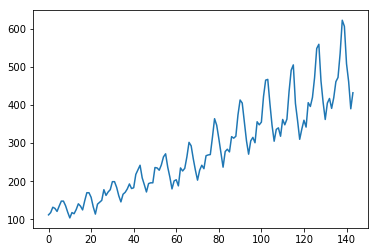

In [31]:
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('Dane/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()

In [32]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [33]:
numpy.random.seed(7)

In [34]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [35]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

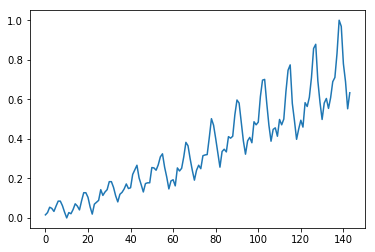

In [36]:
plt.plot(dataset)
plt.show()

In [37]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [38]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [39]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [40]:
#reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [41]:
trainX[:10]

array([[[ 0.01544401,  0.02702703,  0.05405405]],

       [[ 0.02702703,  0.05405405,  0.04826255]],

       [[ 0.05405405,  0.04826255,  0.03281853]],

       [[ 0.04826255,  0.03281853,  0.05984557]],

       [[ 0.03281853,  0.05984557,  0.08494207]],

       [[ 0.05984557,  0.08494207,  0.08494207]],

       [[ 0.08494207,  0.08494207,  0.06177607]],

       [[ 0.08494207,  0.06177607,  0.02895753]],

       [[ 0.06177607,  0.02895753,  0.        ]],

       [[ 0.02895753,  0.        ,  0.02702703]]], dtype=float32)

In [46]:
testX[:10]

array([[[ 0.40733591,  0.3803089 ,  0.48648646]],

       [[ 0.3803089 ,  0.48648646,  0.47104248]],

       [[ 0.48648646,  0.47104248,  0.48455599]],

       [[ 0.47104248,  0.48455599,  0.61389959]],

       [[ 0.48455599,  0.61389959,  0.69691122]],

       [[ 0.61389959,  0.69691122,  0.70077217]],

       [[ 0.69691122,  0.70077217,  0.57915056]],

       [[ 0.70077217,  0.57915056,  0.46911195]],

       [[ 0.57915056,  0.46911195,  0.38803086]],

       [[ 0.46911195,  0.38803086,  0.44787642]]], dtype=float32)

In [42]:
trainY[:10]

array([ 0.04826255,  0.03281853,  0.05984557,  0.08494207,  0.08494207,
        0.06177607,  0.02895753,  0.        ,  0.02702703,  0.02123553], dtype=float32)

In [43]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2,validation_split=0.1)

Train on 82 samples, validate on 10 samples
Epoch 1/100
 - 1s - loss: 0.0377 - val_loss: 0.1437
Epoch 2/100
 - 0s - loss: 0.0171 - val_loss: 0.0867
Epoch 3/100
 - 0s - loss: 0.0118 - val_loss: 0.0618
Epoch 4/100
 - 0s - loss: 0.0104 - val_loss: 0.0544
Epoch 5/100
 - 0s - loss: 0.0096 - val_loss: 0.0471
Epoch 6/100
 - 0s - loss: 0.0088 - val_loss: 0.0404
Epoch 7/100
 - 0s - loss: 0.0080 - val_loss: 0.0388
Epoch 8/100
 - 0s - loss: 0.0074 - val_loss: 0.0299
Epoch 9/100
 - 0s - loss: 0.0067 - val_loss: 0.0268
Epoch 10/100
 - 0s - loss: 0.0061 - val_loss: 0.0241
Epoch 11/100
 - 0s - loss: 0.0055 - val_loss: 0.0211
Epoch 12/100
 - 0s - loss: 0.0051 - val_loss: 0.0203
Epoch 13/100
 - 0s - loss: 0.0047 - val_loss: 0.0180
Epoch 14/100
 - 0s - loss: 0.0044 - val_loss: 0.0166
Epoch 15/100
 - 0s - loss: 0.0042 - val_loss: 0.0152
Epoch 16/100
 - 0s - loss: 0.0040 - val_loss: 0.0133
Epoch 17/100
 - 0s - loss: 0.0038 - val_loss: 0.0135
Epoch 18/100
 - 0s - loss: 0.0037 - val_loss: 0.0131
Epoch 19/10

In [44]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.97 RMSE
Test Score: 47.78 RMSE


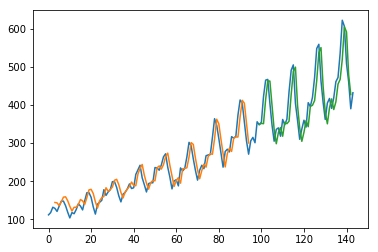

In [45]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()